In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, shape
import geopandas as gpd
import pickle
import os
import sys
from pathlib import Path, PureWindowsPath

# Import custom functions from `scripts` folder
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from scripts.clean_tweets import geometrize_tweets, convert_shapefile_crs, find_frequencies

np.random.seed(42)
pd.set_option('display.max_columns', 999)
data_path = Path("C:/Users/emman/Box/Spring 2020/Displacement Studio/Datasets/")
shape_path = Path("C:/Users/emman/Box/Spring 2020/Displacement Studio/Shared 228 Sydney Folder/SA2 Shapefiles/")

dv_analysis_path =  Path("C:/Users/emman/Box/Spring 2020/Displacement Studio/Shared 228 Sydney Folder/AU Work/MasterTypologyFolder")
sa2_w_dv = pd.read_csv(dv_analysis_path/'dummies_t3_corridor.csv')

In [2]:
# read twitter data from 2012-2016 respectively
au12 = pd.read_csv(data_path/'au_twt2012.csv')
au13 = pd.read_csv(data_path/'au_twt2013.csv')
au14 = pd.read_csv(data_path/'au_twt2014.csv')
au15 = pd.read_csv(data_path/'au_twt2015.csv')
au16 = pd.read_csv(data_path/'au_twt2016.csv')

In [3]:
# Convert to GeoDataFrame based on lat/lon
au12 = geometrize_tweets(au12)

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [4]:
au13 = geometrize_tweets(au13)

In [5]:
au14 = geometrize_tweets(au14)

In [6]:
au15 = geometrize_tweets(au15)

In [7]:
au16 = geometrize_tweets(au16)

In [8]:
# Read Australia SA2 shapefiles sa2_ucl
syd_ucl_sa2 = gpd.read_file(shape_path/'sa2_ucl.dbf')
# We also need to change the crs 
syd_ucl_sa2.crs = {'init': 'epsg:4326'}

In [9]:
syd_ucl_sa2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SA2_MAIN16  265 non-null    object  
 1   SA2_5DIG16  265 non-null    object  
 2   SA2_NAME16  265 non-null    object  
 3   SA3_CODE16  265 non-null    object  
 4   SA3_NAME16  265 non-null    object  
 5   SA4_CODE16  265 non-null    object  
 6   SA4_NAME16  265 non-null    object  
 7   GCC_CODE16  265 non-null    object  
 8   GCC_NAME16  265 non-null    object  
 9   STE_CODE16  265 non-null    object  
 10  STE_NAME16  265 non-null    object  
 11  AREASQKM16  265 non-null    float64 
 12  geometry    265 non-null    geometry
dtypes: float64(1), geometry(1), object(11)
memory usage: 27.0+ KB


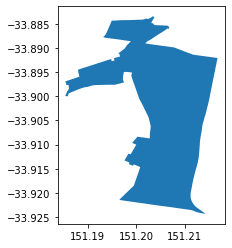

In [10]:
# Read in case study areas 
# let's isolate the sa2s that make up our case study areas of Redfern/Waterloo, Merrickville and Maroubra
red_wat_gdf = syd_ucl_sa2[(syd_ucl_sa2.SA2_MAIN16=='117031335')
                          |(syd_ucl_sa2.SA2_MAIN16=='117031338')]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
red_wat_simple = red_wat_gdf[['SA2_MAIN16','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
red_wat_sgdf=red_wat_simple.dissolve(by="SA4_NAME16")
red_wat_sgdf.plot()

In [11]:
syd_ucl_sa2

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry
0,115011290,11290,Baulkham Hills (East),11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,8.3081,"POLYGON ((150.97069 -33.75928, 150.97071 -33.7..."
1,115011291,11291,Baulkham Hills (West) - Bella Vista,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,10.9631,"POLYGON ((150.94715 -33.74089, 150.94704 -33.7..."
2,115011294,11294,Glenhaven,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,7.2309,"POLYGON ((150.98461 -33.70294, 150.98468 -33.7..."
3,115011296,11296,West Pennant Hills,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,7.8291,"POLYGON ((151.02214 -33.73881, 151.02214 -33.7..."
4,115011553,11553,Castle Hill - Central,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,4.1512,"POLYGON ((150.97343 -33.73437, 150.97332 -33.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,128021536,11536,Oyster Bay - Como - Jannali,12802,Sutherland - Menai - Heathcote,128,Sydney - Sutherland,1GSYD,Greater Sydney,1,New South Wales,8.9053,"POLYGON ((151.06905 -33.99818, 151.06907 -33.9..."
261,128021538,11538,Sutherland - Kirrawee,12802,Sutherland - Menai - Heathcote,128,Sydney - Sutherland,1GSYD,Greater Sydney,1,New South Wales,7.7547,"POLYGON ((151.05049 -34.02006, 151.05098 -34.0..."
262,128021607,11607,Engadine,12802,Sutherland - Menai - Heathcote,128,Sydney - Sutherland,1GSYD,Greater Sydney,1,New South Wales,8.9538,"POLYGON ((150.99568 -34.05362, 150.99569 -34.0..."
263,128021608,11608,Loftus - Yarrawarrah,12802,Sutherland - Menai - Heathcote,128,Sydney - Sutherland,1GSYD,Greater Sydney,1,New South Wales,3.8436,"POLYGON ((151.03954 -34.04176, 151.03954 -34.0..."


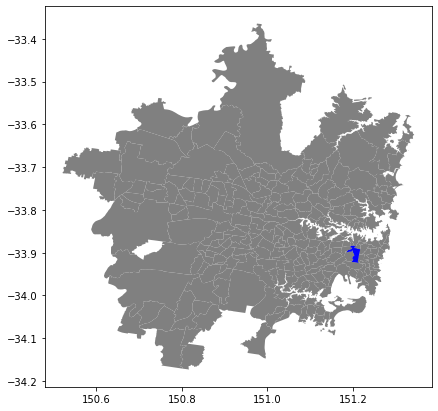

In [12]:
fig, ax = plt.subplots(figsize=(10, 7))
syd_ucl_sa2.plot(ax=ax, color='gray')
red_wat_sgdf.plot(ax=ax, color='blue');

## Assign tracts to tweets 
We are interested in two features:

   1. Whether or not a tweet is generated from our case study areas.
   1. Whether or not a tweet is within 0.5 miles of our case study areas

#### First case study area: Redfern/Waterloo

In [13]:
# Compute a spatial join between tweets and redfern/waterloo
au12_rf_cs = gpd.sjoin(au12, red_wat_sgdf, how='left', op='intersects')
au13_rf_cs = gpd.sjoin(au13, red_wat_sgdf, how='left', op='intersects')
au14_rf_cs = gpd.sjoin(au14, red_wat_sgdf, how='left', op='intersects')
au15_rf_cs = gpd.sjoin(au15, red_wat_sgdf, how='left', op='intersects')
au16_rf_cs = gpd.sjoin(au16, red_wat_sgdf, how='left', op='intersects')

In [14]:
# If the tweet point lies in the tract geometry, `br_diss` is not null.
au12['redwat'] = ~au12_rf_cs['SA2_MAIN16'].isnull()
au13['redwat'] = ~au13_rf_cs['SA2_MAIN16'].isnull()
au14['redwat'] = ~au13_rf_cs['SA2_MAIN16'].isnull()
au15['redwat'] = ~au13_rf_cs['SA2_MAIN16'].isnull()
au16['redwat'] = ~au13_rf_cs['SA2_MAIN16'].isnull()

In [15]:
print(f"{au12['redwat'].sum()} of {len(au12)} 2012 tweets are from Redfern/Waterloo")
print(f"{au13['redwat'].sum()} of {len(au13)} 2013 tweets are from Redfern/Waterloo")
print(f"{au14['redwat'].sum()} of {len(au14)} 2014 tweets are from Redfern/Waterloo")
print(f"{au15['redwat'].sum()} of {len(au15)} 2015 tweets are from Redfern/Waterloo")
print(f"{au16['redwat'].sum()} of {len(au16)} 2016 tweets are from Redfern/Waterloo")

23654 of 720158 2012 tweets are from Redfern/Waterloo
68945 of 2160422 2013 tweets are from Redfern/Waterloo
64836 of 2020287 2014 tweets are from Redfern/Waterloo
33347 of 1031142 2015 tweets are from Redfern/Waterloo
49841 of 1563682 2016 tweets are from Redfern/Waterloo


# 2. Capturing distance from Redfern/Waterloo Area

Our next objective is to find tweets within 0.5 miles of Redfern/Waterloo. Instead of creating a buffer around Redfern/Waterloo, we can instead create a 0.5 mile buffer around each tweet's location, then find all tweets that overlap with the geometry of Redfern/Waterloo. The leftmost picture below illustrates this approach; we can consider the square to be the geometry of Redfern/Waterloo, and the circle to be the geometry of a single tweet.


Each degree of latitude is approximately 69 miles apart. For longitude to miles, at a given latitude, the conversion is as follows [source](https://gis.stackexchange.com/questions/142326/calculating-longitude-length-in-miles):

1 degree of longitude = cosine(latitude in decimal) * length of degree (miles) at equator

Then we compute:

In [16]:
# -33.9 is roughly the median latitude of Redfern/Waterloo
np.cos(-33.905) * 69.172

-54.96107569491768

1 degree of latitude is 69 miles, and 1 degree of longitude is 54.9610 miles. This means that 0.5 miles is represented by $\frac{0.5}{69} \approx 0.007246$ degrees of latitude and $\frac{0.5}{54.9610} \approx 0.009097$ degrees of longitude. A roughly 0.5 mile buffer can be established by creating a buffer of ~0.009 degrees around each tweet.

In [17]:
BUFFER = 0.009

# Build dataframe containing buffer around each tweet
au12_buffer, au13_buffer, au14_buffer, au15_buffer, au16_buffer = au12.copy(), au13.copy(), au14.copy(), au15.copy(), au16.copy()
au12_buffer['geometry'] = au12_buffer.buffer(BUFFER)
au13_buffer['geometry'] = au13_buffer.buffer(BUFFER)
au14_buffer['geometry'] = au14_buffer.buffer(BUFFER)
au15_buffer['geometry'] = au15_buffer.buffer(BUFFER)
au16_buffer['geometry'] = au16_buffer.buffer(BUFFER)

### Capturing distance from Redfern/Waterloo

In [18]:
# Compute a spatial join between tweets and redfern/waterloo + buffer
au12_bufjoin_rw = gpd.sjoin(au12_buffer, red_wat_sgdf, how='left', op='intersects')
au13_bufjoin_rw = gpd.sjoin(au13_buffer, red_wat_sgdf, how='left', op='intersects')

In [19]:
au14_bufjoin_rw = gpd.sjoin(au14_buffer, red_wat_sgdf, how='left', op='intersects')
au15_bufjoin_rw = gpd.sjoin(au15_buffer, red_wat_sgdf, how='left', op='intersects')

In [20]:
au16_bufjoin_rw = gpd.sjoin(au16_buffer, red_wat_sgdf, how='left', op='intersects')

In [ ]:
# If the tweet buffer intersects the tract geometry, `br_diss` is not null.
au12['buffer'] = ~au12_bufjoin_rw['SA2_MAIN16'].isnull()
au13['buffer'] = ~au13_bufjoin_rw['SA2_MAIN16'].isnull()
au14['buffer'] = ~au14_bufjoin_rw['SA2_MAIN16'].isnull()
au15['buffer'] = ~au15_bufjoin_rw['SA2_MAIN16'].isnull()
au16['buffer'] = ~au16_bufjoin_rw['SA2_MAIN16'].isnull()

In [ ]:
# Visualize one expanded tweet (blue), one regular tweet (red):
fig, ax = plt.subplots(figsize=(10, 7))
syd_ucl_sa2.plot(ax=ax, color='gray')
au16_buffer.sample(n=1).plot(ax=ax, color='blue')
au13.sample(n=1).plot(ax=ax, color='red');

In [ ]:
print(f"{(au12['buffer'] & ~au12['redwat']).sum()} of {len(au12)} 2012 tweets are from the buffer")
print(f"{(au13['buffer'] & ~au13['redwat']).sum()} of {len(au13)} 2013 tweets are from the buffer")
print(f"{(au14['buffer'] & ~au14['redwat']).sum()} of {len(au14)} 2013 tweets are from the buffer")
print(f"{(au15['buffer'] & ~au15['redwat']).sum()} of {len(au15)} 2013 tweets are from the buffer")
print(f"{(au16['buffer'] & ~au16['redwat']).sum()} of {len(au16)} 2013 tweets are from the buffer")

#### Capturing distance for Marrickville

In [ ]:
# # Add hour for future analysis
# au12['hour'] = pd.to_datetime(au12['created_at'] // 1000, unit='s').dt.hour
# au13['hour'] = pd.to_datetime(au13['created_at'] // 1000, unit='s').dt.hour
# au14['hour'] = pd.to_datetime(au14['created_at'] // 1000, unit='s').dt.hour
# au15['hour'] = pd.to_datetime(au15['created_at'] // 1000, unit='s').dt.hour
# au16['hour'] = pd.to_datetime(au16['created_at'] // 1000, unit='s').dt.hour

# Analysis of derogatory words for Aboriginal people frequencies

We first observe all tweets (regardless of timestamp). For , to avoid any overlap with other words, we check for two patterns:


We also make our analysis case-insensitive.

In [ ]:
# All tweets sent from Redfern/Waterloo
# print('{} of {} tweets sent from Redfern/Waterloo in 2012 contain "abo"'.format(
#     *find_frequencies(au12.loc[au12['redwat'], 'text'], r'abo')))

# print('{} of {} tweets sent from Redfern/Waterloo in 2012 contain "abbo "'.format(
#     *find_frequencies(au12.loc[au12['redwat'], 'text'], r'abbo')))

# print('{} of {} tweets sent from Redfern/Waterloo in 2012 contain "boong"'.format(
#     *find_frequencies(au12.loc[au12['redwat'], 'text'], r'boong')))

# print('{} of {} tweets sent from Redfern/Waterloo in 2012 contain "bung "'.format(
#     *find_frequencies(au12.loc[au12['redwat'], 'text'], r'bung')))

# print('{} of {} tweets sent from Redfern/Waterloo in 2012 contain "coon "'.format(
#     *find_frequencies(au12.loc[au12['redwat'], 'text'], r'coon')))

# print('{} of {} tweets sent from Redfern/Waterloo in 2012 contain "lubra"'.format(
#     *find_frequencies(au12.loc[au12['redwat'], 'text'], r'lubra')))

# print('{} of {} tweets sent from Redfern/Waterloo in 2012 contain "gin "'.format(
#     *find_frequencies(au12.loc[au12['redwat'], 'text'], r'gin')))



In [ ]:
print('{} of {} tweets sent from Redfern/Waterloo in 2012 contain "Redfern"'.format(
    *find_frequencies(au12.loc[au12['redwat'], 'text'], r'redfern')))

print('{} of {} tweets sent from Redfern/Waterloo in 2012 contain "Waterloo"'.format(
    *find_frequencies(au12.loc[au12['redwat'], 'text'], r'waterloo')))